<a href="https://colab.research.google.com/github/mehtabr1212/PRODIGY_DS_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd

titanic_df = pd.read_csv('/content/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Step 1: Handling Missing Values

In [118]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [119]:
# Impute missing values for 'Age' column with median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' column with mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to high number of missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

In [120]:
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [121]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Step 2: Exploring Data Distribution

In [122]:
print(titanic_df.describe())  # Summary statistics for numerical variables
print("\n")
print(titanic_df['SibSp'].value_counts())  # Distribution of Siblings and Spouses
print("\n")
print(titanic_df['Parch'].value_counts())  # Distribution of Parents and Childrens
print("\n")
print(titanic_df['Pclass'].value_counts())  # Distribution of passenger class

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: coun

#Step 3: Feature Engineering

In [123]:
# Creating a new feature: 'FamilySize' by combining 'SibSp' and 'Parch'

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [124]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


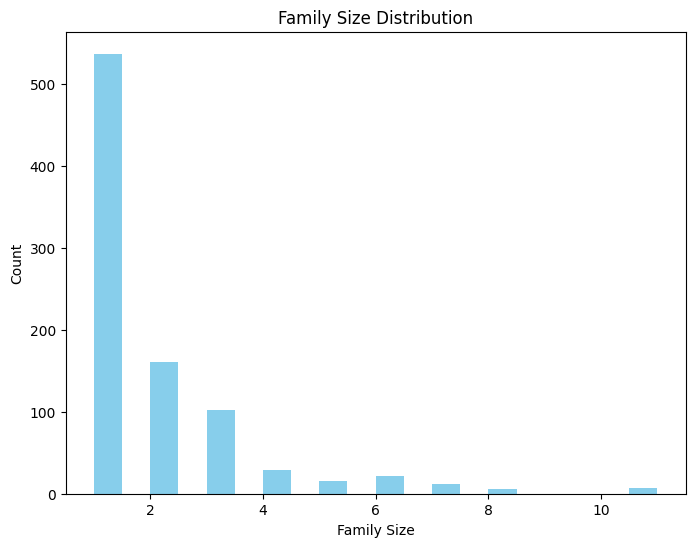

In [125]:
# Histogram for Family Size
plt.figure(figsize=(8, 6))
titanic_df['FamilySize'].plot(kind='hist', bins=20, color='skyblue')
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

#Step 4: Visualizing Relationships

# **Age Distribution:**
* Provides an overview of passenger ages.
* Shows the frequency of passengers in different age groups.
* Indicates the shape of the distribution and any prominent age groups.
* Helps identify gaps or sparse areas in the data.

Overall, it helps to understand the age demographics of passengers on the Titanic and reveals patterns or trends related to age.

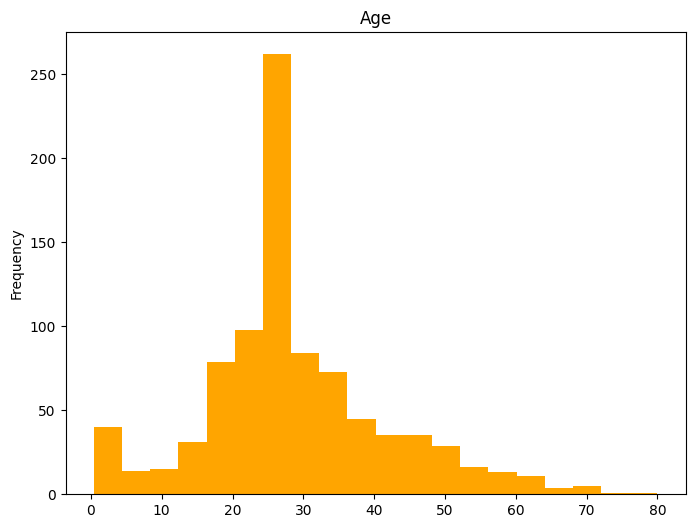

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

# Histogram of age
titanic_df['Age'].plot(kind='hist', bins=20, title='Age', color='orange')
plt.show()

# Age vs. Survived (Boxplot):

The boxplot shows the distribution of ages for passengers who survived (Survived = 1) and those who did not survive (Survived = 0).

**Insights:**

It allows us to compare the median age of survivors and non-survivors.

For example, if the median age of survivors is higher than non-survivors, it might indicate that younger passengers had a higher chance of survival.
It also shows the spread of ages (interquartile range) for both groups, providing insights into the age distribution of survivors and non-survivors.

#Survival Rate by Passenger Class (Barplot):

The barplot shows the survival rate (proportion of passengers who survived) for each passenger class (Pclass).

**Insights:**

It allows us to compare the survival rates between different passenger classes.

For example, if the survival rate is higher for passengers in first class compared to third class, it suggests that passenger class may have influenced survival chances. It provides a clear visual representation of the disparities in survival rates between different passenger classes, which can be valuable for understanding the impact of socio-economic status on survival.

Overall, these visualizations help in understanding the relationship between variables (age, passenger class) and survival on the Titanic, providing insights into potential factors that influenced survival outcomes.

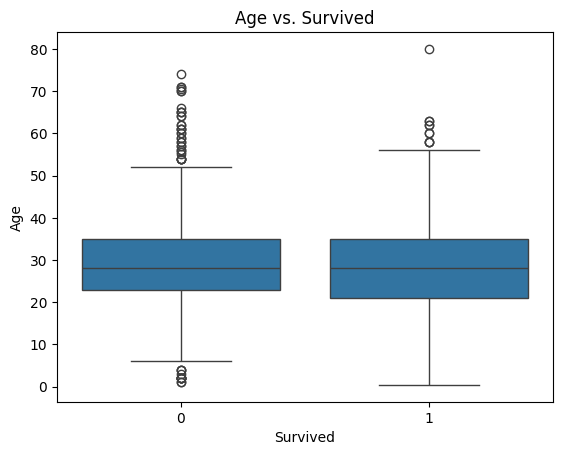

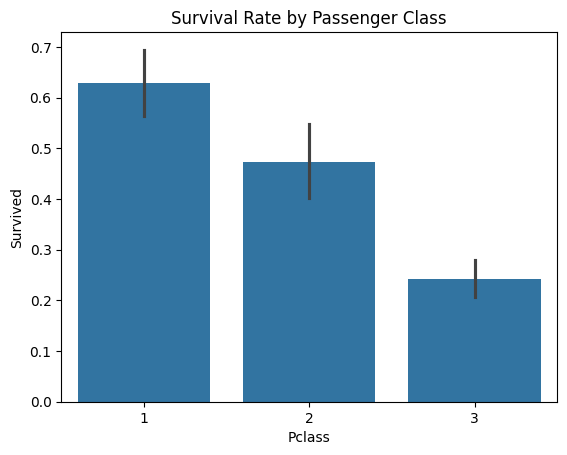

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between 'Age' and 'Survived'
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Age vs. Survived')
plt.show()

# Relationship between 'Pclass' and 'Survived'
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

* The value of 0.6 (Approx.) for the first class indicates approximately 60% of passengers in the first class survived the Titanic disaster.

* The value of 0.45 (Approx.) for the first class indicates approximately 45% of passengers in the second class survived the Titanic disaster.

* The value of 0.2 (Approx.) for the first class indicates approximately 20% of passengers in the third class survived the Titanic disaster.

This information helps in understanding the proportion of survivors relative to the total number of passengers in each passenger class.

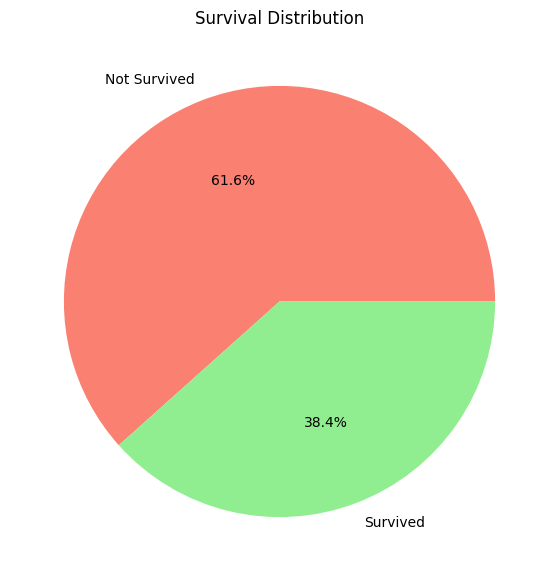

In [128]:
# Calculating survival counts
survival_counts = titanic_df['Survived'].value_counts()

# Plotting pie chart
plt.figure(figsize=(7, 7))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['salmon', 'lightgreen'])
plt.title('Survival Distribution')
plt.show()

# Age Distribution by Gender and Survival:
* Shows the distribution of ages for male and female passengers, with separate boxes for survivors and non-survivors.
* Allows comparison of age distributions between male and female survivors and non-survivors.
* Helps understand if age played a role in survival differently for males and females.

# Age Distribution by Passenger Class and Survival:
* Displays the distribution of ages across different passenger classes, with separate boxes for survivors and non-survivors.
* Enables comparison of age distributions between survivors and non-survivors within each passenger class.
* Helps identify if there were age-related differences in survival rates across different passenger classes.

Overall, these visualizations provide insights into the relationship between age, gender, passenger class, and survival on the Titanic, helping to understand potential factors influencing survival outcomes.

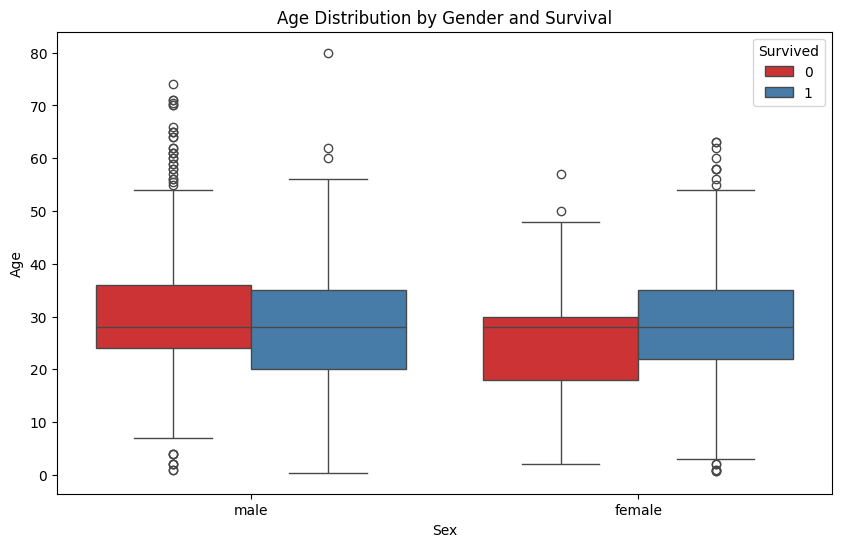

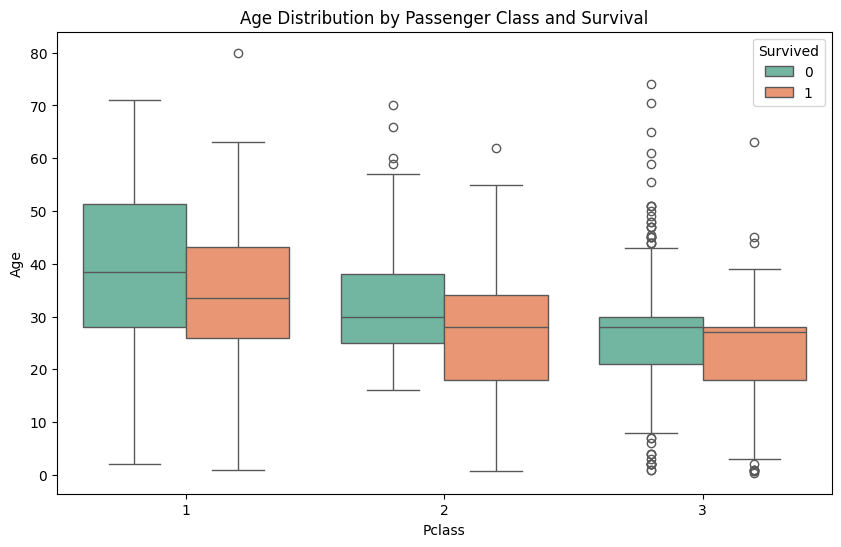

In [129]:
# Relationship between age, gender, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Age', hue='Survived', data=titanic_df, palette='Set1')
plt.title('Age Distribution by Gender and Survival')
plt.show()

# Relationship between age, passenger class, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, palette='Set2')
plt.title('Age Distribution by Passenger Class and Survival')
plt.show()

# Age vs. Fare by Survival:
* Displays a scatter plot of age vs. fare, with points colored by survival status (survived or not).
* Helps visualize the distribution of ages and fares paid by passengers, with differentiation based on survival outcome.
* Facilitates understanding if there are any discernible patterns or clusters related to survival status across different age and fare ranges.

# Age vs. Fare by Passenger Class:
* Presents a scatter plot of age vs. fare, with points colored by passenger class (1st, 2nd, or 3rd).
* Allows examination of the relationship between age, fare, and passenger class.
* Assists in identifying any trends or patterns in age and fare distribution based on passenger class.

Overall, these visualizations aid in understanding the relationships between age, fare, passenger class, and survival on the Titanic, providing insights into potential factors influencing survival outcomes and ticket pricing.

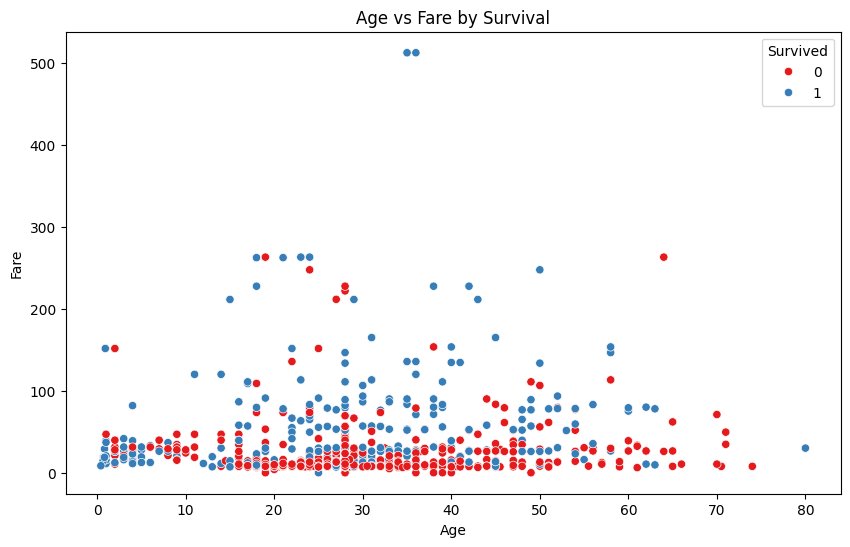

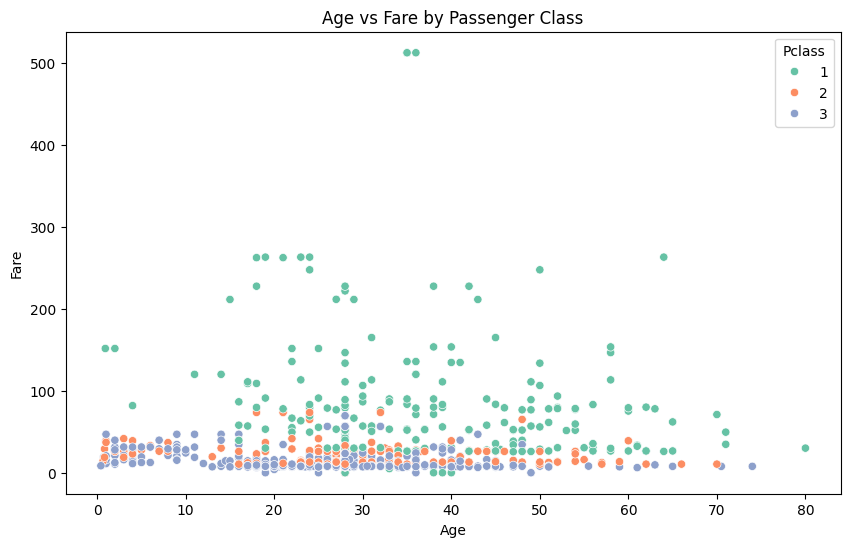

In [130]:
# Relationship between age, fare, and survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df, palette='Set1')
plt.title('Age vs Fare by Survival')
plt.show()

# Relationship between age, fare, and passenger class
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Pclass', data=titanic_df, palette='Set2')
plt.title('Age vs Fare by Passenger Class')
plt.show()

<ipython-input-131-73455c46aa4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_df, palette='Set2')


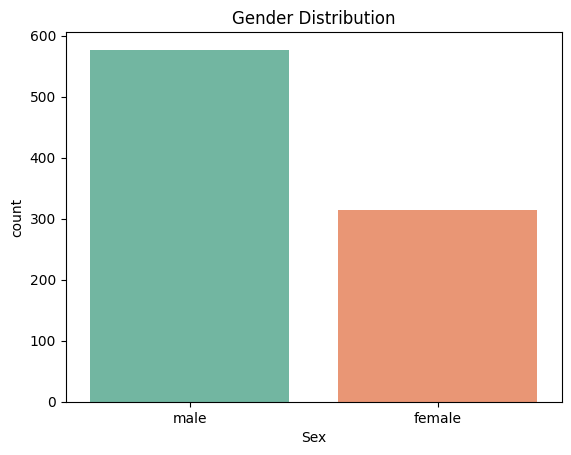

In [131]:
# Bar plot for Gender Distribution
sns.countplot(x='Sex', data=titanic_df, palette='Set2')
plt.title('Gender Distribution')
plt.show()

# Gender vs. Embarked (Heatmap):

* Visualizes gender distribution across embarked ports.
* Helps compare gender composition between different ports.
* Reveals patterns or trends in gender distribution by embarkation location.

**Overall Insights:**

* Provides insights into the demographic composition of passengers from different regions.
* Highlights potential patterns or trends related to gender and embarkation location.

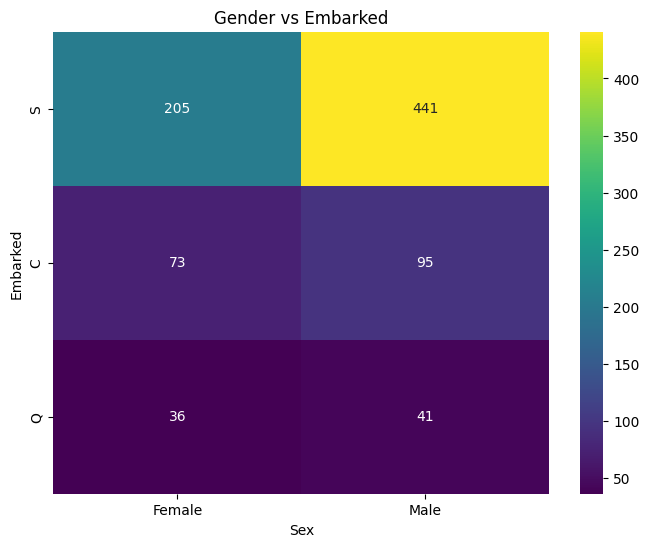

In [132]:
plt.figure(figsize=(8, 6))

# Creating a DataFrame for 2D histogram
df_2dhist = pd.DataFrame({
    'Female': titanic_df[titanic_df['Sex'] == 'female']['Embarked'].value_counts(),
    'Male': titanic_df[titanic_df['Sex'] == 'male']['Embarked'].value_counts()
})

# Ploting the heatmap
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')
plt.xlabel('Sex')
plt.ylabel('Embarked')
plt.title('Gender vs Embarked')
plt.show()

# Fare Distribution by Gender and Survival:
* Illustrates the distribution of fares paid by male and female passengers, with separate boxes for survivors and non-survivors.
* Facilitates comparison of fare distributions between male and female survivors and non-survivors.
* Helps determine if fare paid had any correlation with survival, differentiated by gender.

# Fare Distribution by Passenger Class and Survival:
* Depicts the distribution of fares across different passenger classes, with separate boxes for survivors and non-survivors.
* Enables comparison of fare distributions between survivors and non-survivors within each passenger class.
* Assists in identifying potential differences in survival rates based on fare paid and passenger class.

Overall, these visualizations aid in understanding the relationship between fare, gender, passenger class, and survival on the Titanic, shedding light on factors that may have influenced survival outcomes.

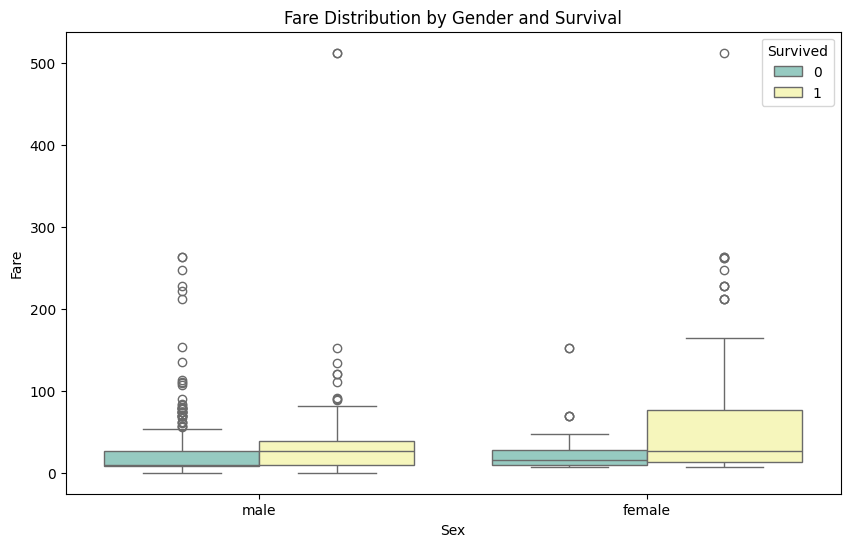

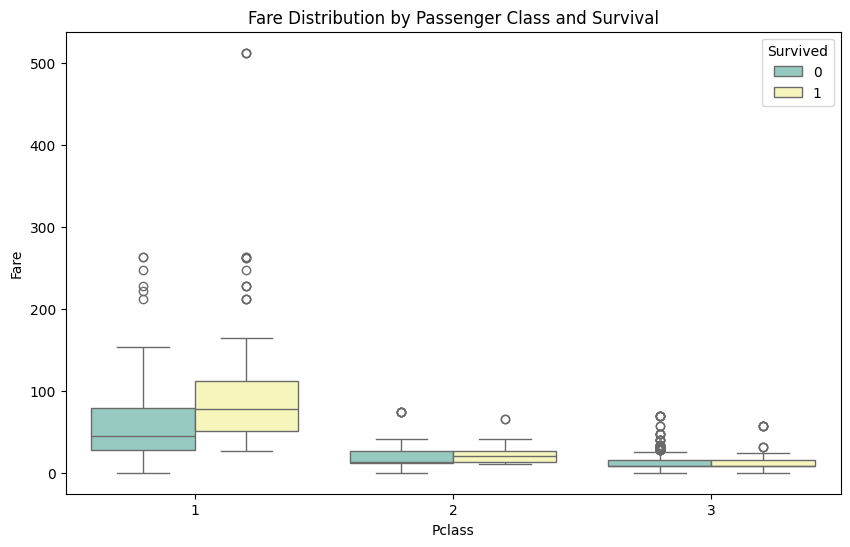

In [133]:
# Relationship between fare, gender, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Fare', hue='Survived', data=titanic_df, palette='Set3')
plt.title('Fare Distribution by Gender and Survival')
plt.show()

# Relationship between fare, passenger class, and survival
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df, palette='Set3')
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()

# Correlation Matrix:
* Displays a heatmap representing the correlation coefficients between numerical variables.
* Values closer to 1 indicate strong positive correlations, while values closer to -1 indicate strong negative correlations.
* Helps identify relationships and dependencies between numerical variables.
* Provides insights into which variables may be strongly correlated with each other.

Overall, this visualization aids in understanding the degree and direction of relationships between numerical variables in the Titanic dataset, allowing for insights into potential patterns or dependencies within the data.

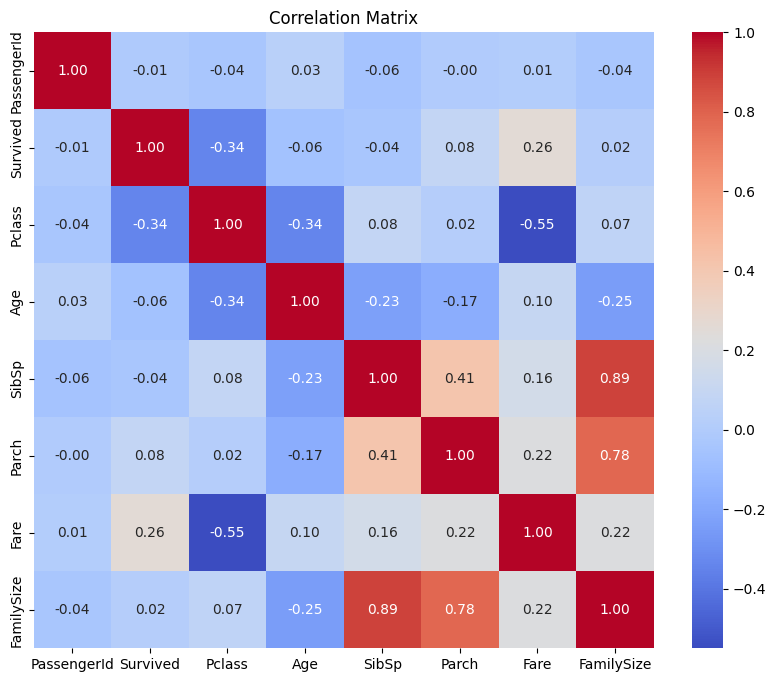

In [134]:
# Selecting only numerical columns
numeric_columns = titanic_df.select_dtypes(include=['number'])

# Performing correlation analysis
correlation_matrix = numeric_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()